In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.DataFrame({
    'X': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'Y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
k = 3

# centroid ={}
# for i in range(k):
#     centroid[i+1] = [np.random.randint(0, 80), np.random.randint(0, 80)]

centroids = {
    i + 1: [np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(k)
}

In [7]:
df

,X,Y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


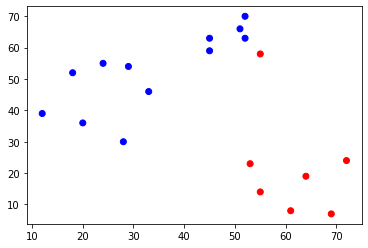

In [21]:
plt.scatter(df['X'], df['Y'], color=df["color"])
plt.show()

In [10]:
centroids

{1: [60, 25], 2: [42, 19], 3: [39, 23]}

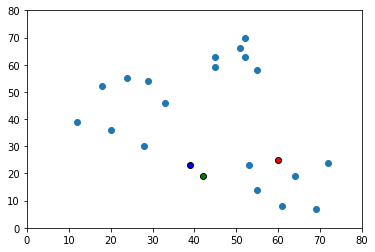

In [11]:
# To visualize data-points and initial centroids
plt.scatter(df["X"], df["Y"])
colmap = {1: 'red', 2: 'green', 3: 'blue'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolors='black')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [12]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['X'] - centroids[i][0]) ** 2 + (df['Y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    print(centroid_distance_cols)
    return df


df = assignment(df, centroids)
print(df)

['distance_from_1', 'distance_from_2', 'distance_from_3']
     X   Y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        50.000000        36.055513        31.384710        3  blue
1   20  36        41.484937        27.802878        23.021729        3  blue
2   28  30        32.388269        17.804494        13.038405        3  blue
3   18  52        49.929951        40.804412        35.805028        3  blue
4   29  54        42.449971        37.336309        32.572995        3  blue
5   33  46        34.205263        28.460499        23.769729        3  blue
6   24  55        46.861498        40.249224        35.341194        3  blue
7   45  59        37.161808        40.112342        36.496575        3  blue
8   45  63        40.853396        44.102154        40.447497        3  blue
9   52  70        45.705580        51.971146        48.764741        1   red
10  51  66        41.976184        47.853944        44.643029        1   red
11  52  63        

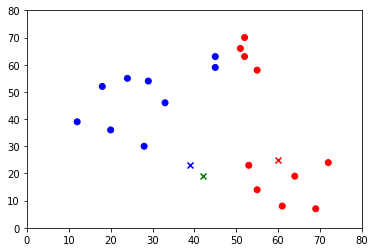

In [13]:
plt.scatter(df['X'], df['Y'], color=df["color"])
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker='x')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [14]:
old_cent = centroids.copy()
print(old_cent)

{1: [60, 25], 2: [42, 19], 3: [39, 23]}


In [15]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['X'])
        # print(df[df['closest'] == i]['X'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Y'])
        # print(np.mean(df[df['closest'] == i]['Y']))
    return k

In [16]:
centroids = update(centroids)

In [17]:
print(centroids)

{1: [58.4, 35.2], 2: [nan, nan], 3: [28.22222222222222, 48.22222222222222]}


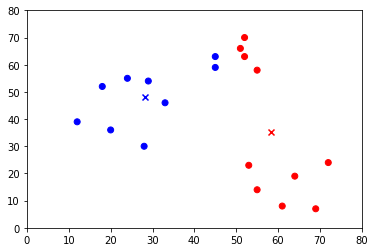

In [18]:
plt.scatter(df['X'], df['Y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker='x')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [19]:
df = assignment(df, centroids)

['distance_from_1', 'distance_from_2', 'distance_from_3']


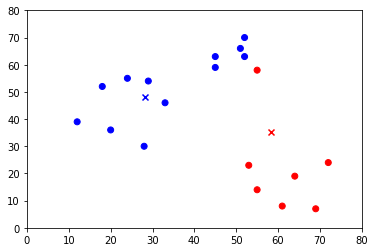

In [20]:
plt.scatter(df['X'], df['Y'], color=df['color'])

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker='x')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()